In [3]:
!pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [137]:
## Importando dados sobre o consumo de combustível e emissão de CO2 de diferentes veículos
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [138]:
#3 Tranformando os dados em um dataframe
df = pd.read_csv(url)

## Visualizando os 5 primeiros registros
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [139]:
## Descrição dos dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [140]:
compare_data = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
compare_data.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
82,2.0,4,8.7,200
992,2.5,4,9.5,218
596,3.6,6,12.8,294
754,5.5,8,18.2,419
3,3.5,6,11.1,255
7,3.7,6,11.1,255
256,1.4,4,7.9,182
844,3.8,6,12.9,297
4,3.5,6,10.6,244


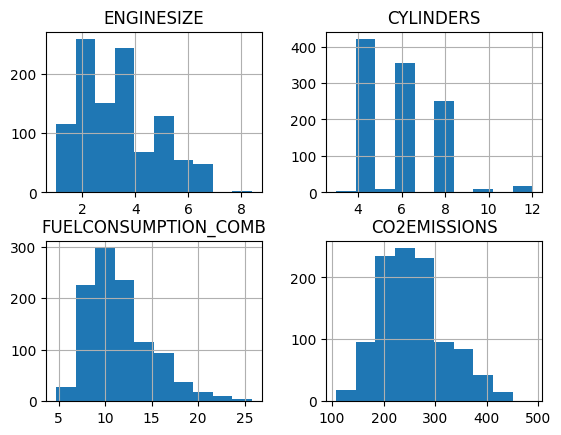

In [141]:
## Visualizando os dados 
vis = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
vis.hist() # Visualiza os dados em histograma das tabelas selecionadas no pandas
plt.show()

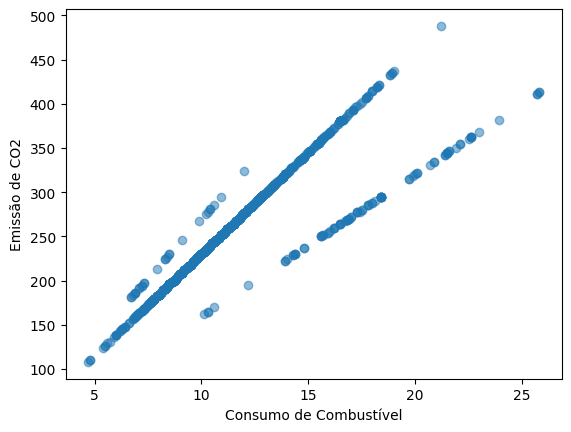

In [142]:
## Comparando o consumo de combustível com a emissão de CO2
plt.scatter(compare_data.FUELCONSUMPTION_COMB, compare_data.CO2EMISSIONS,  alpha=0.5)
plt.xlabel('Consumo de Combustível')
plt.ylabel('Emissão de CO2')
plt.show()

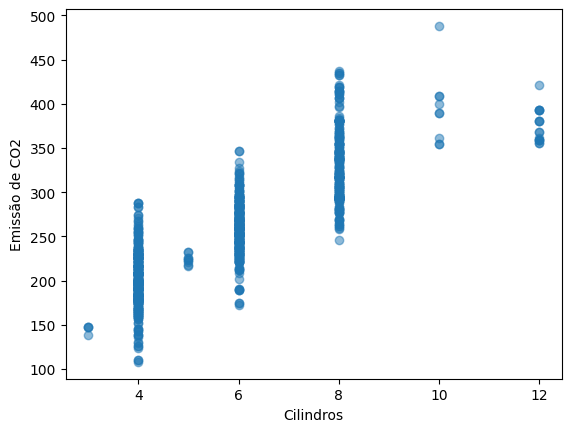

In [143]:
## Comparando o número de cilindros com a emissão de CO2
plt.scatter(compare_data.CYLINDERS, compare_data.CO2EMISSIONS, alpha=0.5)
plt.xlabel('Cilindros')
plt.ylabel('Emissão de CO2')
plt.show()

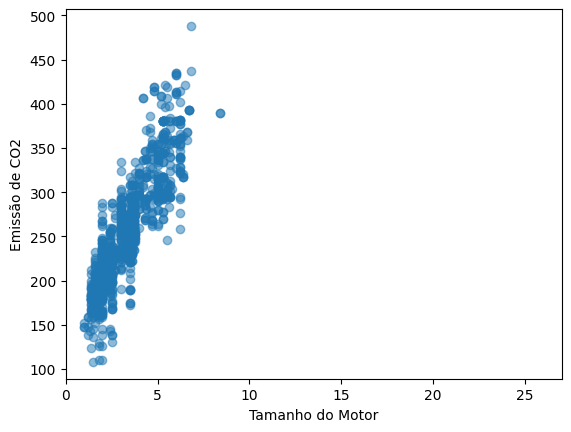

In [144]:
## Comparando o tamanho do motor com a emissão de CO2
plt.scatter(compare_data.ENGINESIZE, compare_data.CO2EMISSIONS,  alpha=0.5)
plt.xlabel('Tamanho do Motor')
plt.ylabel('Emissão de CO2')
plt.xlim(0,27) # limita o eixo x
plt.show()

In [145]:
## Definindo as variáveis de entrada e saída
X = compare_data.ENGINESIZE.to_numpy()
y = compare_data.CO2EMISSIONS.to_numpy()

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Saída de um array ou vetores NumPy com uma dimensão
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [147]:
## Importando o Sklearn

from sklearn.linear_model import LinearRegression

## Criando um modelo de regressão linear
modelo = LinearRegression()

## Treinando um modelo de regressão linear
modelo.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

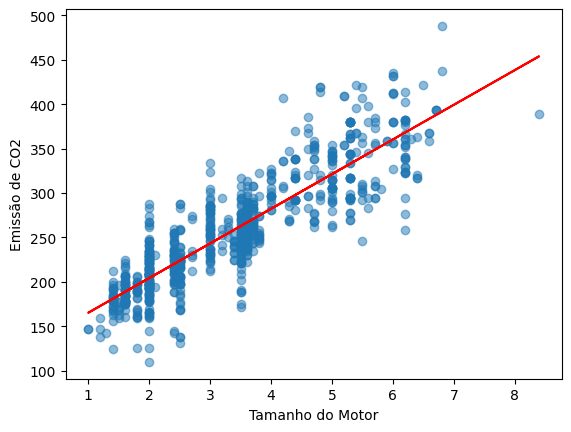

In [148]:
## The regression model is the line given by y = intercept + coefficient * x.
plt.scatter(X_train, y_train, alpha=0.5)
plt.plot(X_train, modelo.coef_ * X_train + modelo.intercept_, '-r')
plt.xlabel('Tamanho do Motor')
plt.ylabel('Emissão de CO2')
plt.show()

In [149]:
## Avaliando o modelo
## Aqui você pode comparar os valores previstos pelo modelo com os valores reais
## Vamos usar o MSE aqui para calcular a precisão do nosso modelo com base no conjunto de testes

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

## Utilizando o método predict para testar as previsões do modelo
y_test_ = modelo.predict(X_test.reshape(-1, 1))

print('Mean Absolute Error (MAE).....: %.2f' % mean_absolute_error(y_test_, y_test))
print('Mean Squared Error (MSE)......: %.2f' % mean_squared_error(y_test_, y_test))
print('Root Mean Squared Error (RMSE): %.2f' % root_mean_squared_error(y_test_, y_test))
print('R2-score......................: %.2f' % r2_score(y_test_, y_test))

Mean Absolute Error (MAE).....: 24.10
Mean Squared Error (MSE)......: 985.94
Root Mean Squared Error (RMSE): 31.40
R2-score......................: 0.68


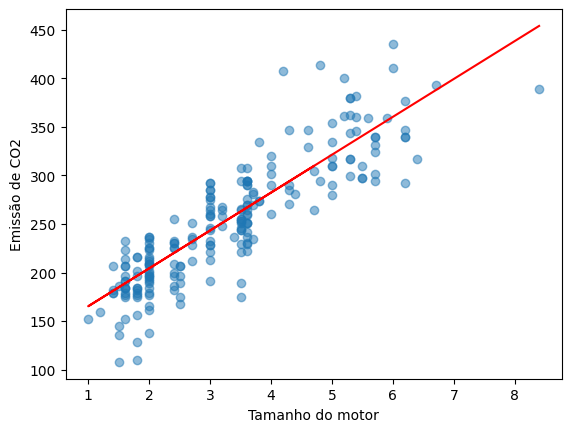

In [150]:
## Visualizando as saídas do modelo
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, modelo.coef_ * X_test + modelo.intercept_, color='red')
plt.xlabel('Tamanho do motor')
plt.ylabel('Emissão de CO2')
plt.show()

In [152]:
X = compare_data.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [155]:
regr = LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

y_test_ = regr.predict(X_test.reshape(-1,1))

print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))

Mean squared error: 797.43


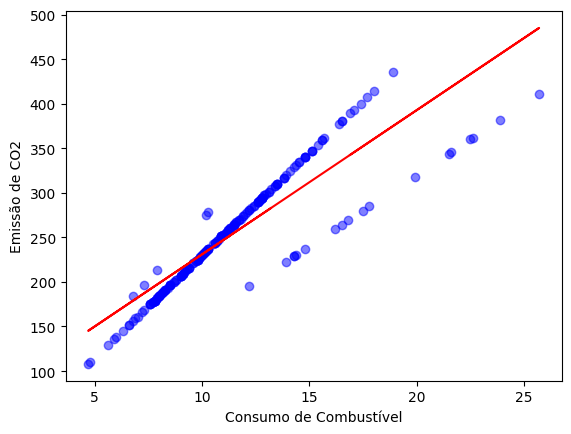

In [ ]:
plt.scatter(X_test, y_test, alpha=0.5)
plt.plot(X_test, regr.coef_*X_test + regr.intercept_, color='red')
plt.xlabel('Consumo de Combustível')
plt.ylabel('Emissão de CO2')
plt.show()